### Bibliotecas

In [1]:
import pandas as pd
import seaborn as sns
import numpy

In [2]:
df = pd.read_csv('netflix_full.csv')
df.head(2)

,id,type,name,creator,starring,year,rating,time,genres,country,describle
0,81416533,Movie,Heart of Stone,NaN,"Gal Gadot, Jamie Dornan, Alia Bhatt",2023,TV-PG,125 min,"Drama Movies ,Action & Adventure Movies ,Spy M...",United States,An intelligence operative for a shadowy global...
1,80991406,Movie,Johnny English Strikes Again,NaN,"Rowan Atkinson, Ben Miller, Emma Thompson",2018,TV-PG,88 min,"Family Movies ,Comedy Movies ,Action & Adventu...",United States,After a cyberattack exposes every undercover a...


In [3]:
df.shape

(3256, 11)

### 
    1 - verificar se ha registros duplicados
    2 - verificar se ha valores nulos
    3 - tratar valores nulos
    4 - 

In [5]:
print('Quantidades de linhas duplicadas : ', df.duplicated().sum())

Quantidades de linhas duplicadas :  0


In [6]:
df.isnull().sum()

id              0
type            0
name            0
creator      2543
starring        0
year            0
rating          0
time            0
genres          1
country       282
describle       0
dtype: int64

In [7]:
df.groupby(['country']).size()

country
Argentina           9
Australia          33
Austria             3
Belgium             7
Brazil             35
Canada             53
Chile               2
China             138
Colombia           15
Czech Republic      1
Denmark             9
Egypt               5
France             68
Germany            33
India             168
Indonesia          62
Ireland             2
Italy              22
Japan             341
Kuwait              3
Lebanon             9
Malaysia           17
Mexico             49
Netherlands         7
Nigeria            16
Norway             11
Peru                1
Philippines        47
Poland             97
Portugal            3
Russia              2
Saudi Arabia       10
Singapore          25
South Africa       25
South Korea       342
Spain              76
Sweden              8
Syria               2
Thailand           88
Turkey             24
United Kingdom    149
United States     863
Vietnam            94
dtype: int64

In [8]:
"""
Tratamento de dados.

substituir valores nulos da coluna country
"""

df['country'].fillna('United States', inplace=True)
df.isnull().sum()

/tmp/ipykernel_3286/4234652028.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['country'].fillna('United States', inplace=True)


id              0
type            0
name            0
creator      2543
starring        0
year            0
rating          0
time            0
genres          1
country         0
describle       0
dtype: int64

In [9]:
df.groupby(['genres']).size()

genres
Action & Adventure Movies                                             18
Action & Adventure Movies                                             22
Action & Adventure Movies ,Spy Movies                                  2
Action & Adventure Movies ,Spy Movies                                  4
Action Anime ,Action & Adventure Movies ,Teen Movies ,Anime Movies     3
                                                                      ..
Wedding & Romance Reality TV ,Reality TV                               8
Wedding & Romance Reality TV ,Reality TV ,Docuseries                   1
Wedding & Romance Reality TV ,Reality TV ,Lifestyle                    1
Westerns ,Action & Adventure Movies                                    1
Westerns ,Thriller Movies                                              1
Length: 1412, dtype: int64

In [10]:
df.drop('creator', axis=1, inplace=True)

In [11]:
df.head(3)

,id,type,name,starring,year,rating,time,genres,country,describle
0,81416533,Movie,Heart of Stone,"Gal Gadot, Jamie Dornan, Alia Bhatt",2023,TV-PG,125 min,"Drama Movies ,Action & Adventure Movies ,Spy M...",United States,An intelligence operative for a shadowy global...
1,80991406,Movie,Johnny English Strikes Again,"Rowan Atkinson, Ben Miller, Emma Thompson",2018,TV-PG,88 min,"Family Movies ,Comedy Movies ,Action & Adventu...",United States,After a cyberattack exposes every undercover a...
2,81644420,Movie,Hunt,"Lee Jung-jae, Jung Woo-sung, Jeon Hye-jin",2022,TV-14,125 min,"Drama Movies ,Action & Adventure Movies ,Spy M...",South Korea,As a pair of national security agents hunt a N...


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3256 entries, 0 to 3255
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   id         3256 non-null   int64 
 1   type       3256 non-null   object
 2   name       3256 non-null   object
 3   starring   3256 non-null   object
 4   year       3256 non-null   int64 
 5   rating     3256 non-null   object
 6   time       3256 non-null   object
 7   genres     3255 non-null   object
 8   country    3256 non-null   object
 9   describle  3256 non-null   object
dtypes: int64(2), object(8)
memory usage: 254.5+ KB


In [14]:
df['type'].value_counts()

type
Movie      1662
TV Show    1594
Name: count, dtype: int64

In [15]:
df['year'].value_counts().describe()

count     12.000000
mean     271.333333
std      171.315410
min       53.000000
25%      101.500000
50%      283.000000
75%      395.750000
max      558.000000
Name: count, dtype: float64

### Conclui-se que há evidencias de um aumento de 270 filmes novos por ano na netflix

In [17]:
time = df['time']
time

0       125 min
1        88 min
2       125 min
3       114 min
4       112 min
         ...   
3251     77 min
3252     91 min
3253     97 min
3254     91 min
3255     81 min
Name: time, Length: 3256, dtype: object

In [18]:
# to do como extrair somente numeros de uma string?

In [19]:
minutos = []
lista_digito = []
for i in range(len(time)):
    for c in time[i]:
        if c.isdigit(): 
            lista_digito.append(c)
    minuto = (''.join(str(x) for x in lista_digito))
    del(lista_digito[:])
    minutos.append(minuto)
df['time'] = minutos

In [20]:
df['time'] = df['time'].astype(int)

In [21]:
hr_min = df['time']
serie = []
for i in hr_min:
    if i < 30:
        serie.append(i*60)
    else:
        serie.append(i)
df['time'] = serie
df['time'].describe()

count    3256.000000
mean      114.147727
std       136.083775
min        30.000000
25%        60.000000
50%        95.000000
75%       120.000000
max      1740.000000
Name: time, dtype: float64

In [22]:
df.head(2)

,id,type,name,starring,year,rating,time,genres,country,describle
0,81416533,Movie,Heart of Stone,"Gal Gadot, Jamie Dornan, Alia Bhatt",2023,TV-PG,125,"Drama Movies ,Action & Adventure Movies ,Spy M...",United States,An intelligence operative for a shadowy global...
1,80991406,Movie,Johnny English Strikes Again,"Rowan Atkinson, Ben Miller, Emma Thompson",2018,TV-PG,88,"Family Movies ,Comedy Movies ,Action & Adventu...",United States,After a cyberattack exposes every undercover a...


In [23]:
df['time'] = df['time'].astype(int)

In [24]:
df.head(2)

,id,type,name,starring,year,rating,time,genres,country,describle
0,81416533,Movie,Heart of Stone,"Gal Gadot, Jamie Dornan, Alia Bhatt",2023,TV-PG,125,"Drama Movies ,Action & Adventure Movies ,Spy M...",United States,An intelligence operative for a shadowy global...
1,80991406,Movie,Johnny English Strikes Again,"Rowan Atkinson, Ben Miller, Emma Thompson",2018,TV-PG,88,"Family Movies ,Comedy Movies ,Action & Adventu...",United States,After a cyberattack exposes every undercover a...


In [25]:
df['time'].describe()

count    3256.000000
mean      114.147727
std       136.083775
min        30.000000
25%        60.000000
50%        95.000000
75%       120.000000
max      1740.000000
Name: time, dtype: float64

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3256 entries, 0 to 3255
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   id         3256 non-null   int64 
 1   type       3256 non-null   object
 2   name       3256 non-null   object
 3   starring   3256 non-null   object
 4   year       3256 non-null   int64 
 5   rating     3256 non-null   object
 6   time       3256 non-null   int64 
 7   genres     3255 non-null   object
 8   country    3256 non-null   object
 9   describle  3256 non-null   object
dtypes: int64(3), object(7)
memory usage: 254.5+ KB


In [95]:
#df[df['country'] == 'Brazil']

In [86]:
filmes_brasileiros = df[df['country'] == 'Brazil']
fb =filmes_brasileiros[filmes_brasileiros['type'] == 'Movie']


In [30]:
df.type.value_counts()

type
Movie      1662
TV Show    1594
Name: count, dtype: int64

<Axes: xlabel='type', ylabel='count'>

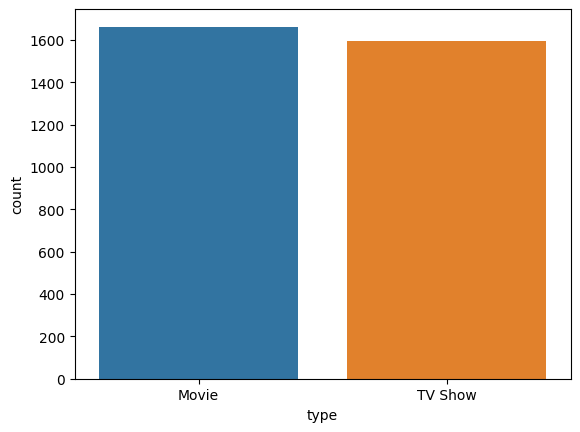

In [107]:
sns.countplot(df, x='type', hue='type')

<Axes: xlabel='time', ylabel='Count'>

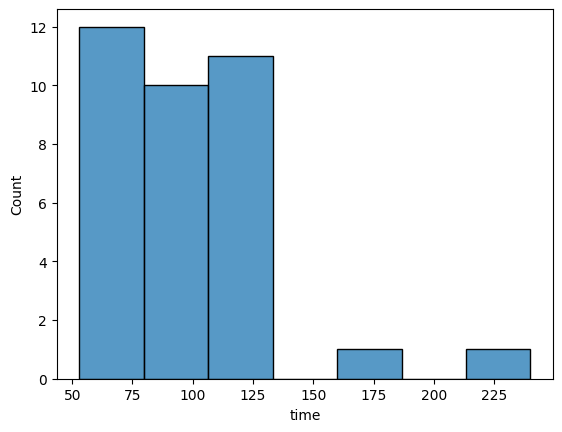

In [32]:
filmes_bra = df.loc[df['country'] == 'Brazil']
sns.histplot(filmes_bra, x='time')

### A média de duração de filmes brasileiros na netflix é de 1h e 40minutos.

In [33]:
filmes_bra.value_counts('genres')

genres
Romantic Comedy Movies ,Comedy Movies ,Romantic Movies                                                            4
Competition Reality TV ,Reality TV                                                                                2
Stand-Up Comedy                                                                                                   2
Sitcoms ,TV Comedies                                                                                              2
Music ,Biographical Documentaries ,Docuseries                                                                     2
Adult Animation ,TV Comedies                                                                                      1
Music ,TV Dramas ,Teen TV Shows ,Crime TV Shows                                                                   1
TV Shows Based on Books ,Teen TV Shows ,TV Horror ,Fantasy TV Shows                                               1
TV Shows Based on Books ,TV Mysteries ,Crime TV Shows ,TV Thrille

<Axes: xlabel='type', ylabel='count'>

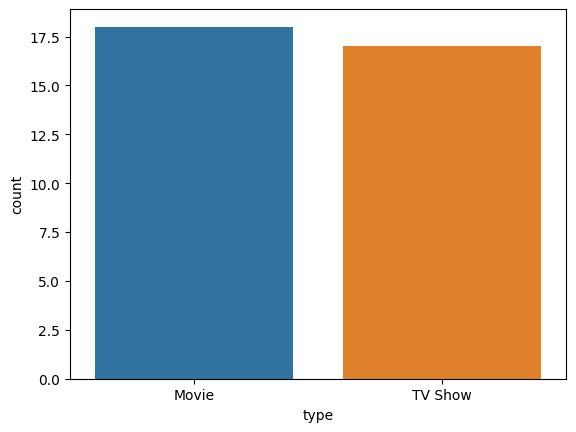

In [106]:
sns.countplot(filmes_bra, x='type', hue='type')

<Axes: xlabel='year', ylabel='count'>

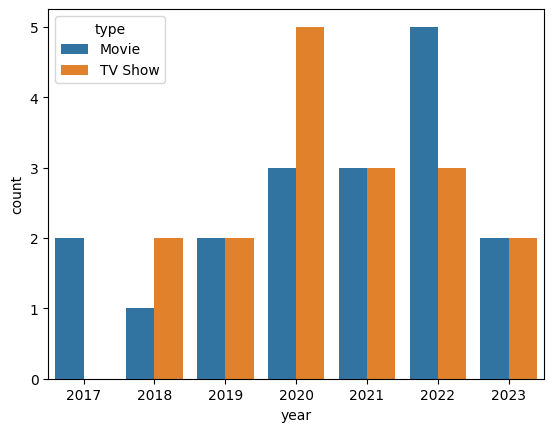

In [109]:
sns.countplot(filmes_bra, x='year', hue='type')

<Axes: xlabel='rating', ylabel='count'>

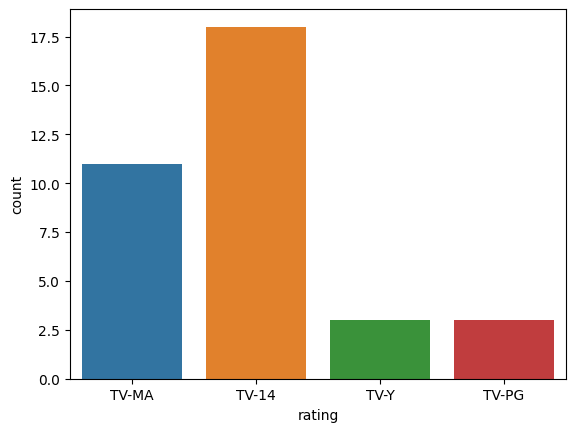

In [104]:
sns.countplot(filmes_bra, x='rating', hue='rating')

In [87]:
import plotly.graph_objects as go
c = 35
percent = [18, 11, 3, 3]
percent = [round((i/c)*100) for i in percent]
rating = ['TV-14', 'TV-MA', 'TV-Y', 'TV-PG']
cores_marcadores = ['khaki', 'MediumSeaGreen', 'blue', 'limegree']


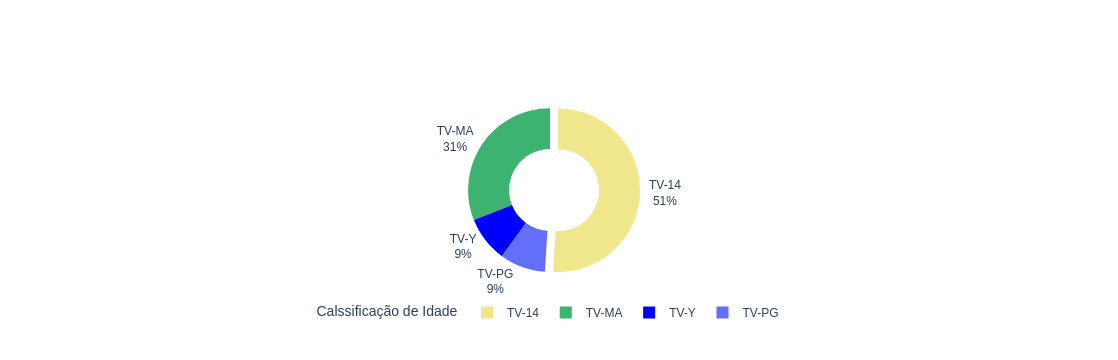

In [88]:
fig = go.Figure(data = go.Pie(labels = rating,
                              values = percent,
                              marker_colors = cores_marcadores,
                              hole = 0.5,
                              pull = [0.10, 0, 0, 0]))
fig.update_traces(textposition = "outside", textinfo="percent+label")
fig.update_layout(legend_title_text="Calssificação de Idade",
                  legend=(dict(orientation="h",
                               xanchor="auto",
                               x=0.5)))
fig.show()

### Agrupando filmes norte americanos e platando graficos da porcentagem das classificações

In [91]:
filmes_usa = df.loc[df['country'] == 'United States']

<Axes: xlabel='type', ylabel='count'>

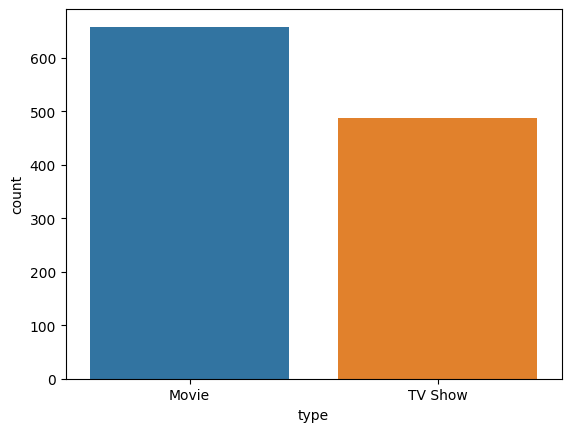

In [103]:
sns.countplot(filmes_usa, x='type', hue='type')

## Proporção entre filmes e tv show por anos

<Axes: xlabel='year', ylabel='count'>

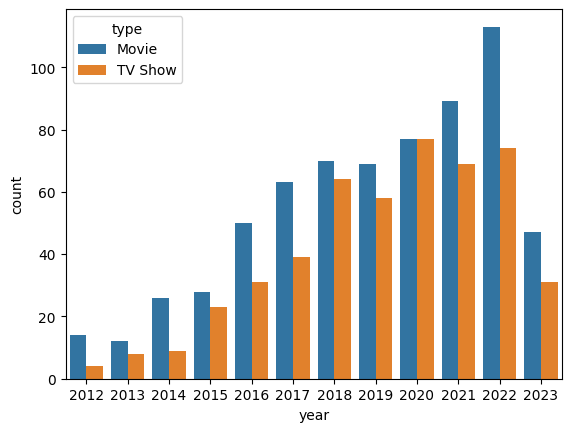

In [108]:
sns.countplot(filmes_usa, x='year', hue='type')

<Axes: xlabel='year', ylabel='time'>

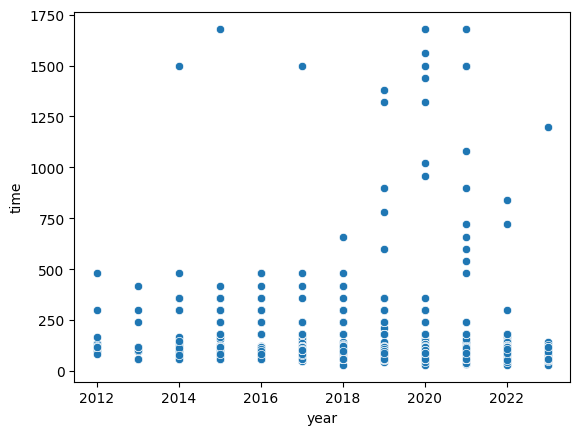

In [96]:
sns.scatterplot(filmes_usa, x='year', y='time')

In [48]:
filmes_usa_movies =filmes_usa[filmes_usa['type'] == 'Movie']
filmes_usa_movies.shape

(658, 10)

### Duração dos filmes

<Axes: xlabel='time', ylabel='Count'>

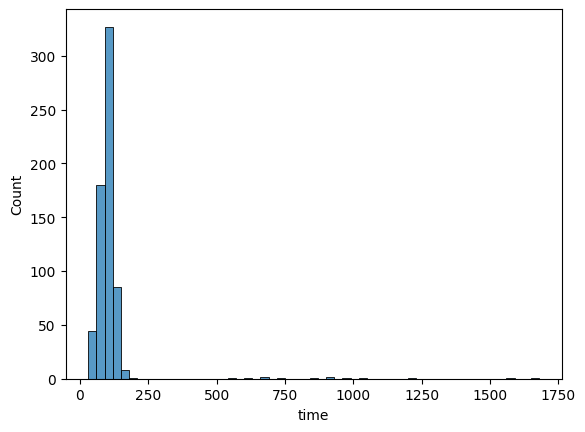

In [90]:
sns.histplot(filmes_usa_movies, x='time', binwidth=30)

### A maioria dos filmes norte americanos tem uma duração de 2h

### Qauntidade de filmes por classificação de idade

<Axes: xlabel='rating', ylabel='count'>

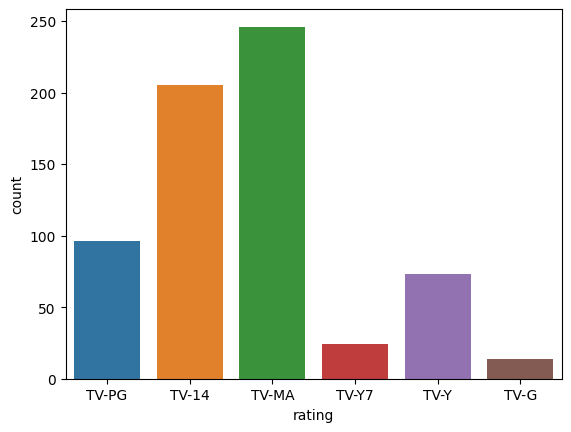

In [110]:
sns.countplot(filmes_usa_movies, x='rating', hue='rating')

In [113]:
filmes_usa_movies.groupby('rating').size()

rating
TV-14    205
TV-G      14
TV-MA    246
TV-PG     96
TV-Y      73
TV-Y7     24
dtype: int64

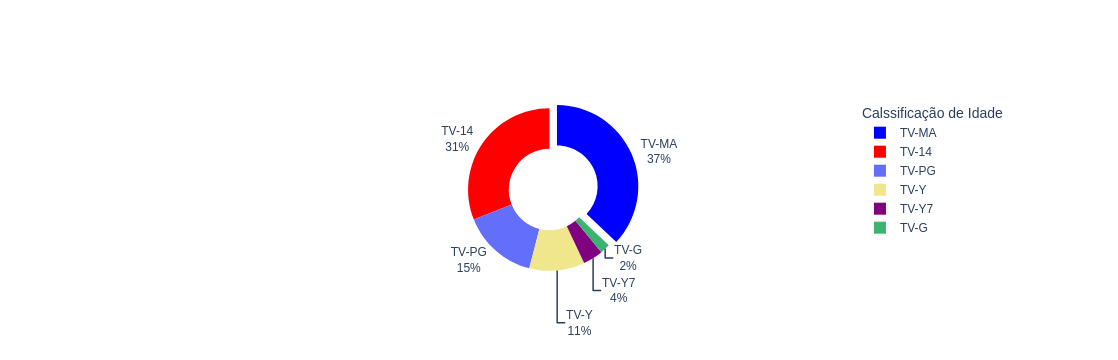

In [114]:
rating = ['TV-14', 'TV-G', 'TV-MA', 'TV-PG', 'TV-Y', 'TV-Y7']
c = 658
quantidade = [205,14,246,96,73,24]
quantidade_r=[round(((i/c)*100)) for i in quantidade]

cores_marcadores = ['red', 'MediumSeaGreen', 'blue', 'limegree', 'khaki', 'purple']

fig = go.Figure(data = go.Pie(labels = rating,
                              values = quantidade_r,
                              marker_colors = cores_marcadores,
                              hole = 0.5,
                              pull = [0, 0, 0.10, 0, 0, 0]))

fig.update_traces(textposition = "outside", textinfo="percent+label")
fig.update_layout(legend_title_text="Calssificação de Idade",)
fig.show()